<>:56: SyntaxWarning: invalid escape sequence '\o'
<>:60: SyntaxWarning: invalid escape sequence '\p'
<>:60: SyntaxWarning: invalid escape sequence '\p'
<>:60: SyntaxWarning: invalid escape sequence '\p'
<>:60: SyntaxWarning: invalid escape sequence '\p'
<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:70: SyntaxWarning: invalid escape sequence '\p'
<>:70: SyntaxWarning: invalid escape sequence '\p'
<>:70: SyntaxWarning: invalid escape sequence '\p'
<>:70: SyntaxWarning: invalid escape sequence '\p'
<>:56: SyntaxWarning: invalid escape sequence '\o'
<>:60: SyntaxWarning: invalid escape sequence '\p'
<>:60: SyntaxWarning: invalid escape sequence '\p'
<>:60: SyntaxWarning: invalid escape sequence '\p'
<>:60: SyntaxWarning: invalid escape sequence '\p'
<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:70: SyntaxWarning: invalid escape sequence '\p'
<>:70: SyntaxWarning: invalid escape sequence '\p'
<>:70: SyntaxWarning: invalid escape sequence '\p'
<>:70: SyntaxWarning: invalid e

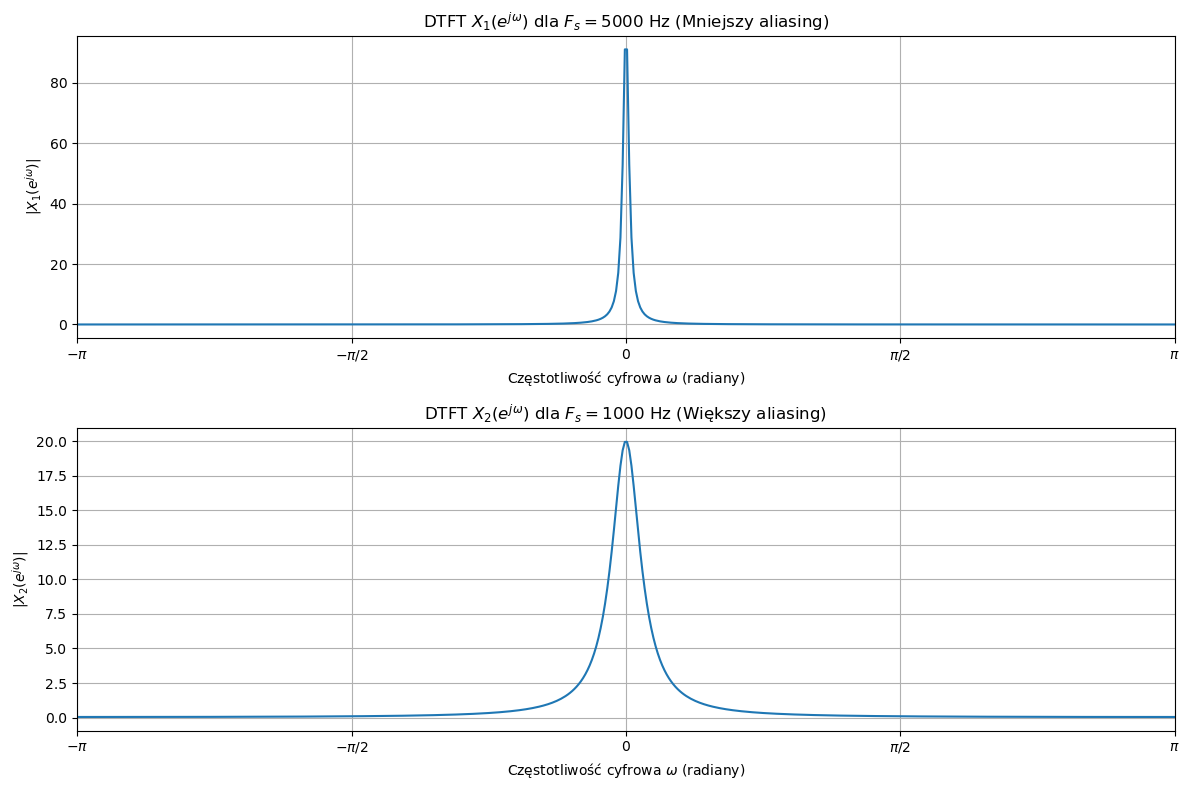

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Analityczna CTFT oryginalnego sygnału xa(t) = exp(-100*abs(t))
# Xa(j*Omega) = 200 / (10000 + Omega^2)
def Xa_jOmega(Omega):
    return 200 / (10000 + Omega**2)

# Funkcja do obliczania DTFT X(e^jw) z CTFT Xa(j*Omega)
# X(e^jw) = Fs * Sum_{k=-M}^{M} Xa(j*(omega*Fs - k*2*pi*Fs))
# Sumujemy dla k od -M do M, aby przybliżyć sumę nieskończoną.
# M=5 oznacza sumowanie 11 członów (k od -5 do 5).
def X_ejw_from_Xa(omega, Fs, num_k_terms=11):
    Omega_s = 2 * np.pi * Fs
    X_ejw_val = 0

    # Generujemy wartości k do sumowania
    k_values = np.arange(-(num_k_terms // 2), num_k_terms // 2 + 1)

    # Sumujemy człony dla każdego k
    for k in k_values:
        # Przeliczamy cyfrową omegę na analogową w k-tej replice
        Omega_k = omega * Fs - k * Omega_s
        X_ejw_val += Xa_jOmega(Omega_k)

    # Mnożymy przez Fs
    return Fs * X_ejw_val

# --- a) Fs = 5000 sample/s ---
Fs1 = 5000
# Zakres cyfrowej częstotliwości do rysowania (zazwyczaj od -pi do pi)
omega1 = np.linspace(-np.pi, np.pi, 500)

# Obliczamy wartości DTFT dla Fs1 dla każdego punktu omega
# Używamy pętli lub list comprehension, bo X_ejw_from_Xa przyjmuje skalarną omegę
X1_ejw = np.array([X_ejw_from_Xa(w, Fs1) for w in omega1])

# --- b) Fs = 1000 sample/s ---
Fs2 = 1000
# Zakres cyfrowej częstotliwości do rysowania (ten sam cyfrowy zakres)
omega2 = np.linspace(-np.pi, np.pi, 500)

# Obliczamy wartości DTFT dla Fs2 dla każdego punktu omega
X2_ejw = np.array([X_ejw_from_Xa(w, Fs2) for w in omega2])

# --- Wykresy ---
# Rysujemy moduł transformaty Fouriera.
# Ponieważ Xa(j*Omega) jest rzeczywiste i dodatnie, DTFT X(e^jw) też będzie rzeczywiste i dodatnie,
# więc moduł jest równy wartości funkcji.
plt.figure(figsize=(12, 8))

# Wykres dla Fs = 5000 Hz (mniejszy aliasing)
plt.subplot(2, 1, 1) # 2 wiersze, 1 kolumna, pierwszy wykres
plt.plot(omega1, X1_ejw)
plt.title(f'DTFT $X_1(e^{{j\\omega}})$ dla $F_s={Fs1}$ Hz (Mniejszy aliasing)')
plt.xlabel('Częstotliwość cyfrowa $\omega$ (radiany)')
plt.ylabel('$|X_1(e^{j\\omega})|$') # Wykres jest dodatni, więc jest to moduł
plt.grid(True)
plt.xlim([-np.pi, np.pi]) # Oś X od -pi do pi
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$']) # Etykiety osi X

# Wykres dla Fs = 1000 Hz (większy aliasing)
plt.subplot(2, 1, 2) # 2 wiersze, 1 kolumna, drugi wykres
plt.plot(omega2, X2_ejw)
plt.title(f'DTFT $X_2(e^{{j\\omega}})$ dla $F_s={Fs2}$ Hz (Większy aliasing)')
plt.xlabel('Częstotliwość cyfrowa $\omega$ (radiany)')
plt.ylabel('$|X_2(e^{j\\omega})|$') # Wykres jest dodatni, więc jest to moduł
plt.grid(True)
plt.xlim([-np.pi, np.pi]) # Oś X od -pi do pi
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$']) # Etykiety osi X

plt.tight_layout() # Popraw rozmieszczenie wykresów
plt.show() # Wyświetl wykresy